In [2]:
import json

data = {}
for name in ["train", "test", "dev"]:
    with open(f"3class/{name}.json") as file:
        data[name] = json.load(file)

In [3]:
print(f"Train: {len(data['train'])}")
print(f"Dev: {len(data['dev'])}")
print(f"Test: {len(data['test'])}")

Train: 7973
Dev: 1411
Test: 1181


In [18]:
for name in ["train", "test", "dev"]:
    print(json.dumps(data[name][1], indent=2))

{
  "sent_id": "201911-02-01",
  "text": "Med integrerte h\u00f8yttalere som p\u00e5 ingen m\u00e5te er diskret plassert , og med en stor subwoofer inkludert , da snakker vi om en gutteskjerm .",
  "label": "Neutral"
}
{
  "sent_id": "201344-02-01",
  "text": "Garmin Fenix Chronos er meget god tur- og treningskamerat , og mye flottere enn vanlige smartklokker .",
  "label": "Positive"
}
{
  "sent_id": "108886-02-01",
  "text": "Hun avslutter , lurt nok , med sin aller st\u00f8rste hit .",
  "label": "Positive"
}


In [6]:
polarities = {}
for name in ["train", "dev", "test"]:
    temp_polarities = {}
    for item in data[name]:
        polarity = item["label"]
        if polarity not in temp_polarities:
            temp_polarities[polarity] = 1
        else:
            temp_polarities[polarity] += 1
    polarities[name] = temp_polarities

In [7]:
print(json.dumps(polarities, indent=4))

{
    "train": {
        "Neutral": 4079,
        "Negative": 1270,
        "Positive": 2624
    },
    "dev": {
        "Neutral": 710,
        "Positive": 490,
        "Negative": 211
    },
    "test": {
        "Neutral": 598,
        "Positive": 401,
        "Negative": 182
    }
}


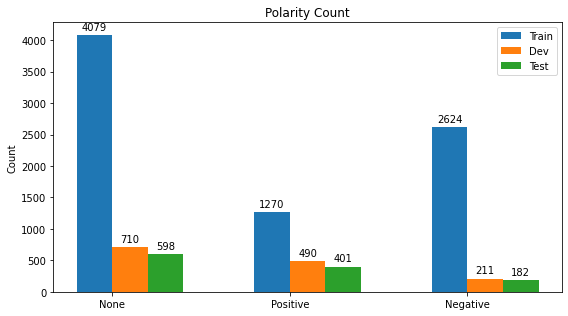

In [8]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["None", "Positive", "Negative"]
train = polarities["train"].values()
dev = polarities["dev"].values()
test = polarities["test"].values()

x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
# Set plot size
fig.set_size_inches(16 / 2, 9 / 2)
rects1 = ax.bar(x - width / 2, train, width, label='Train')
rects2 = ax.bar(x + width / 2, dev, width, label='Dev')
rects3 = ax.bar(x + width / 2 + width, test, width, label='Test')

ax.set_ylabel('Count')
ax.set_title('Polarity Count')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

In [9]:
positive_texts = ""
negative_texts = ""
neutral_texts = ""
for name in ["train", "dev", "test"]:
    for item in data[name]:
        polarity = item["label"]
        if polarity == "Positive":
            positive_texts += item["text"]
        elif polarity == "Negative":
            negative_texts += item["text"]
        else:
            neutral_texts += item["text"]

In [10]:
from wordcloud import WordCloud

with open("../norec_fine/no_stopwords.json", encoding="utf-8") as file:
    stopwords = json.load(file)

positive_wordcloud = WordCloud(stopwords=stopwords).generate(positive_texts)
negative_wordcloud = WordCloud(stopwords=stopwords).generate(negative_texts)

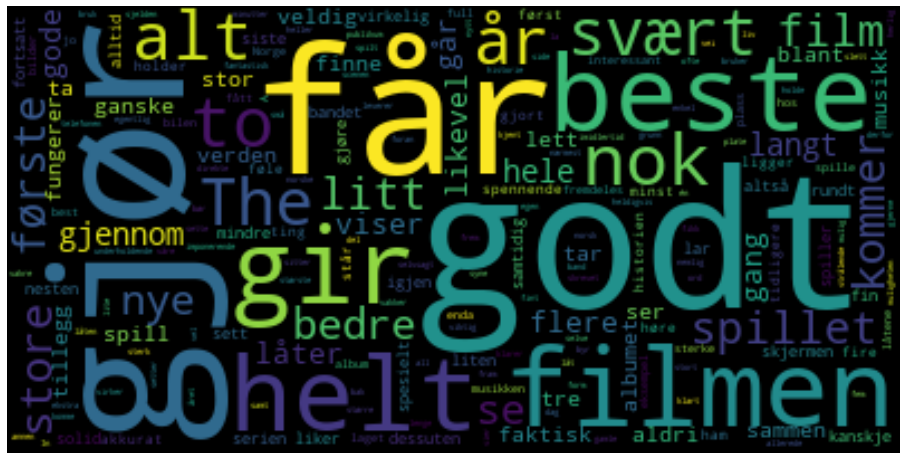

In [11]:
plt.figure(figsize=(16, 9))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

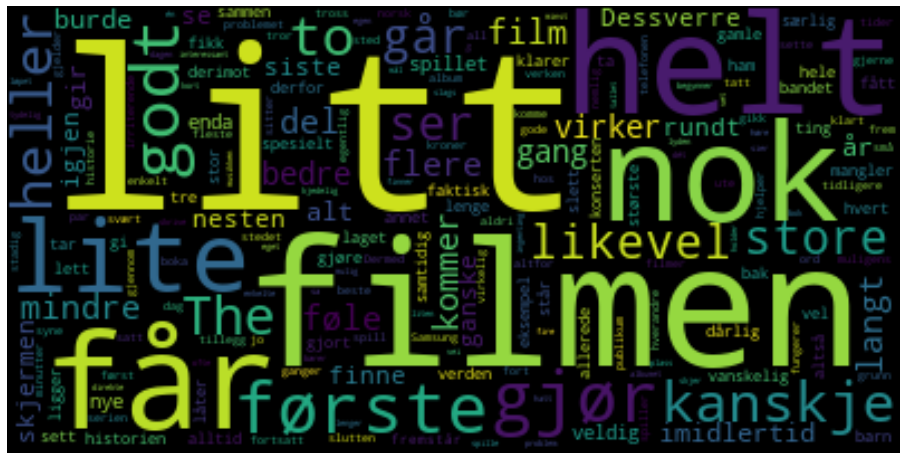

In [12]:
plt.figure(figsize=(16, 9))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()